In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the dataset
df = pd.read_csv(r'C:\Users\anugn\OneDrive\Desktop\Datasets\train_ctrUa4K.csv')

In [4]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df['Credit_History'].mean()


0.8421985815602837

In [11]:
# replacing missing values in Credit_history with mean 
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [12]:
df['Credit_History'].isnull().sum()

0

In [13]:
# replacing missing values in LoanAmount with mean 
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())


In [14]:
# replacing missing values in Loan_Amount_Term with mean 
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())


In [15]:
## Using Label encoding
from sklearn.preprocessing import LabelEncoder 

In [16]:
le = LabelEncoder()

In [17]:
# Counting Male and Female in dataset and replacing missing values with male
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [18]:
# applying label encoder
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender'].value_counts()

1    489
0    112
2     13
Name: Gender, dtype: int64

In [19]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [20]:
df['Married'] = le.fit_transform(df['Married'])
df['Married'].value_counts()

1    398
0    213
2      3
Name: Married, dtype: int64

In [21]:
df['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Dependents'].value_counts()


0    345
1    102
2    101
3     51
4     15
Name: Dependents, dtype: int64

In [23]:
df['Education'].value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [24]:
df['Education'] = le.fit_transform(df['Education'])
df['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(4), int64(1), object(4)
memory usage: 52.9+ KB


## Univariate Analysis


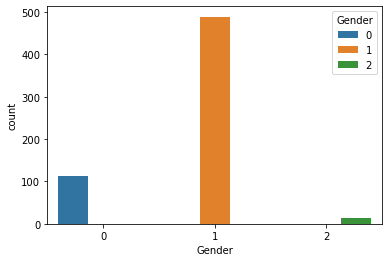

In [26]:
# Plotting histogram for Gender where 0 is female, 1 is male and 2 is missing values
sns.countplot(df['Gender'], hue = df['Gender'])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

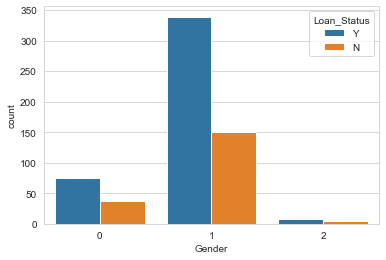

In [27]:
# Plotting for ratio Gender and Loan_status
sns.set_style('whitegrid')
sns.countplot(x='Gender', hue = 'Loan_Status', data = df)


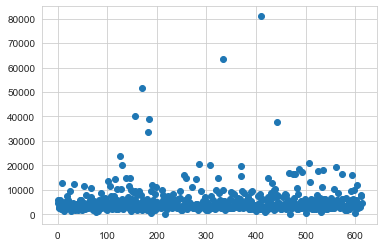

In [28]:
# Scatter plot for Applicant Income
plt.scatter(df.index,df['ApplicantIncome'])
plt.show()

<AxesSubplot:ylabel='Gender'>

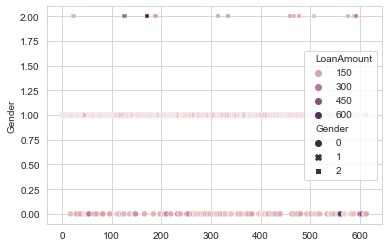

In [29]:
# Scatter plot for gender and loan Amount
sns.scatterplot(x=df.index,y= df['Gender'],hue = df['LoanAmount'], style = df['Gender'])

<AxesSubplot:ylabel='CoapplicantIncome'>

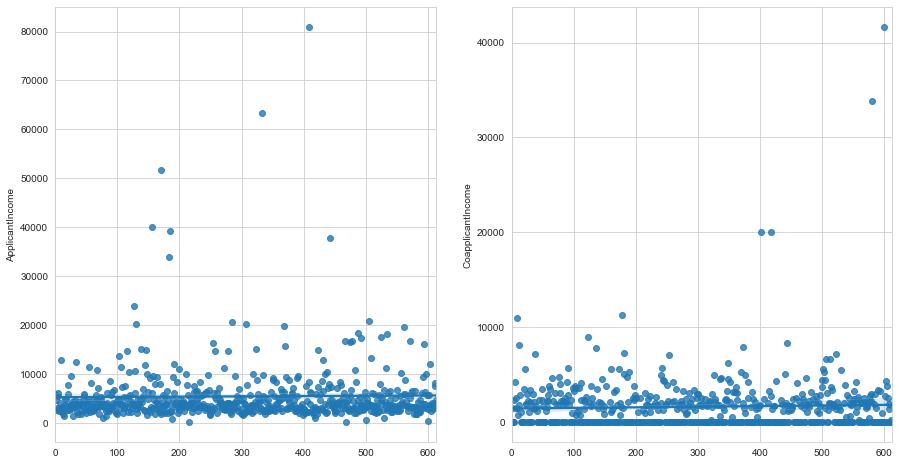

In [30]:
# Regplot for ApplicantIncome and CoapplicantIncome
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,8))
index = [i for i in range(0,df.shape[0])]
sns.regplot(index,df['ApplicantIncome'],ax=ax1)
sns.regplot(index,df['CoapplicantIncome'],ax=ax2)


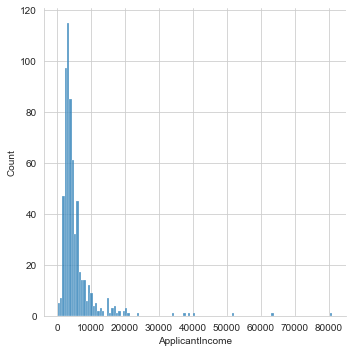

In [31]:
sns.displot(df['ApplicantIncome'])

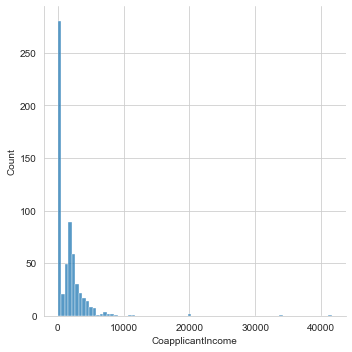

In [32]:
sns.displot(df['CoapplicantIncome'])

<AxesSubplot:ylabel='Loan_Amount_Term'>

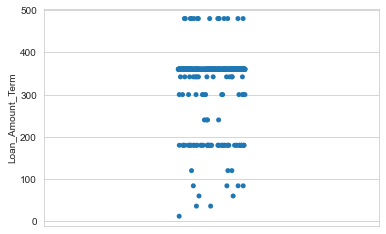

In [33]:
# Strip plot to analyze the Loan Amount Term
sns.stripplot(y=df['Loan_Amount_Term'])

<AxesSubplot:xlabel='ApplicantIncome'>

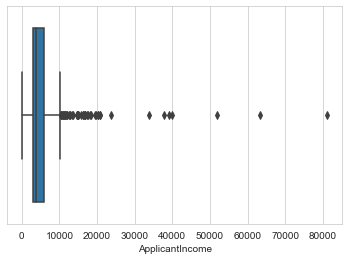

In [34]:
# Plotting boxplot for Applicant Income
sns.boxplot(df['ApplicantIncome'])

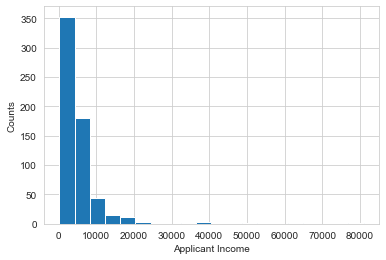

In [37]:
# plotting Histogram with normalisation curve for Applicant Income
plt.hist(df.ApplicantIncome, bins = 20 , rwidth = 8)
plt.xlabel('Applicant Income')
plt.ylabel('Counts')
plt.show()

In [74]:
# Correlation Matrix for Loan Amount
cor = df.corr()
cor


,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,1.000000,0.336094,0.149674,0.024382,0.094472,0.073308,0.136081,-0.067778,-0.000490
Married,0.336094,1.000000,0.338689,0.006759,0.052119,0.069877,0.145541,-0.096253,0.010302
Dependents,0.149674,0.338689,1.000000,0.060466,0.103416,0.011146,0.130722,-0.073683,-0.077539
Education,0.024382,0.006759,0.060466,1.000000,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.136081,0.145541,0.130722,-0.166998,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.067778,-0.096253,-0.073683,-0.077242,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.000490,0.010302,-0.077539,-0.077936,-0.014477,-0.001665,-0.007738,0.001395,1.000000


In [76]:
la = cor[['LoanAmount']]
la

,LoanAmount
Gender,0.136081
Married,0.145541
Dependents,0.130722
Education,-0.166998
ApplicantIncome,0.565620
CoapplicantIncome,0.187828
LoanAmount,1.000000
Loan_Amount_Term,0.038801
Credit_History,-0.007738


In [ ]:
## Bivariate Analysis


<AxesSubplot:>

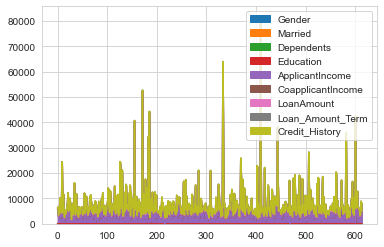

In [43]:
# plotting Graph for area of all feature in dataset

df.plot.area()

<AxesSubplot:>

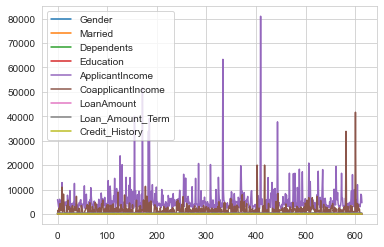

In [44]:
#plotting line for all variables or features in dataset

df.plot.line()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>

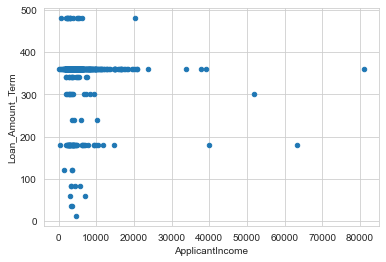

In [47]:
# Scatter plot for Applicant Income and Loan Amount Term

df.plot.scatter(x = 'ApplicantIncome', y = 'Loan_Amount_Term')

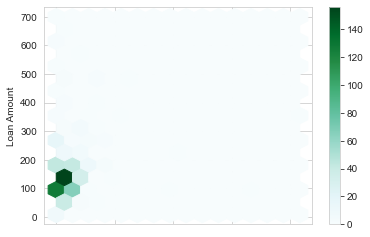

In [53]:
# Plotting Hexbin graph for Co-applicant Income and Loan Amount

df.plot.hexbin(x = 'CoapplicantIncome', y = 'LoanAmount', gridsize = 15)

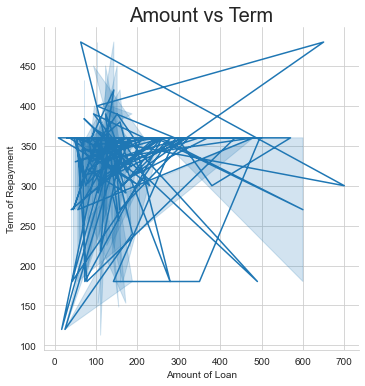

In [60]:
# line plot for Loan Amount and Loan Amount Term

sns.relplot(x = 'LoanAmount',y = 'Loan_Amount_Term', sort = False, kind = 'line', data = df)
plt.xlabel('Amount of Loan')
plt.ylabel('Term of Repayment')
plt.title('Amount vs Term',fontsize = 20)

plt.show()

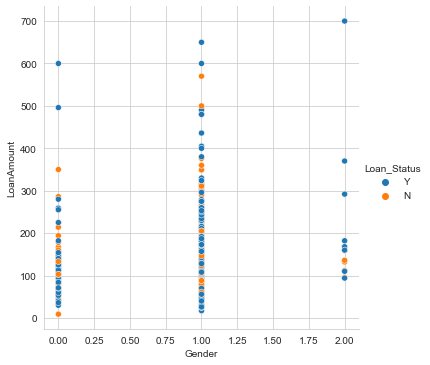

In [62]:
# Scatter plot for Gender and laon Amount

sns.relplot(x='Gender', y='LoanAmount', hue = 'Loan_Status', data = df)

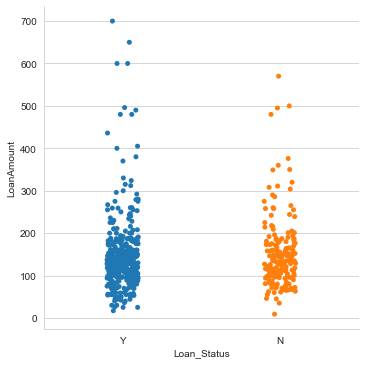

In [65]:
# Plotting Catplot for Loan Status and Loan Amount

sns.catplot(x='Loan_Status', y = 'LoanAmount', order = ('Y','N'),data = df)

In [67]:
# Correlation matrix for Loan Status
cor = df.corr()
cor

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,1.000000,0.336094,0.149674,0.024382,0.094472,0.073308,0.136081,-0.067778,-0.000490
Married,0.336094,1.000000,0.338689,0.006759,0.052119,0.069877,0.145541,-0.096253,0.010302
Dependents,0.149674,0.338689,1.000000,0.060466,0.103416,0.011146,0.130722,-0.073683,-0.077539
Education,0.024382,0.006759,0.060466,1.000000,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.136081,0.145541,0.130722,-0.166998,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.067778,-0.096253,-0.073683,-0.077242,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.000490,0.010302,-0.077539,-0.077936,-0.014477,-0.001665,-0.007738,0.001395,1.000000


In [68]:
cor*100

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,100.000000,33.609420,14.967416,2.438231,9.447245,7.330831,13.608077,-6.777830,-0.049031
Married,33.609420,100.000000,33.868941,0.675875,5.211899,6.987704,14.554056,-9.625266,1.030171
Dependents,14.967416,33.868941,100.000000,6.046609,10.341606,1.114605,13.072191,-7.368288,-7.753886
Education,2.438231,0.675875,6.046609,100.000000,-14.076028,-6.228983,-16.699821,-7.724158,-7.793585
ApplicantIncome,9.447245,5.211899,10.341606,-14.076028,100.000000,-11.660458,56.562046,-4.524182,-1.447665
CoapplicantIncome,7.330831,6.987704,1.114605,-6.228983,-11.660458,100.000000,18.782839,-5.967534,-0.166454
LoanAmount,13.608077,14.554056,13.072191,-16.699821,56.562046,18.782839,100.000000,3.880147,-0.773821
Loan_Amount_Term,-6.777830,-9.625266,-7.368288,-7.724158,-4.524182,-5.967534,3.880147,100.000000,0.139546
Credit_History,-0.049031,1.030171,-7.753886,-7.793585,-1.447665,-0.166454,-0.773821,0.139546,100.000000


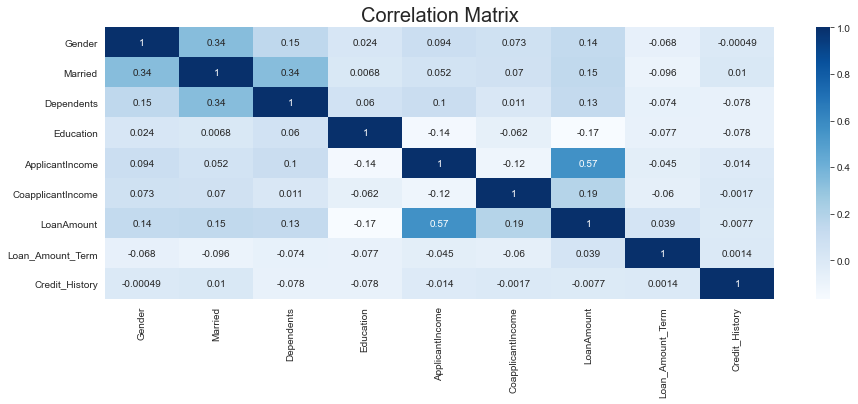

In [69]:
# Plotting heatmap for correlation
plt.figure(figsize = (15,5))
sns.heatmap(cor ,cmap = 'Blues',annot = True)
plt.title('Correlation Matrix', fontsize = 20)

plt.show()

# Univariate Analysis is helpful when we are trying to identify simple exploration of given features of dataset while the biavariate analysis is proven helpful in comparing one on one features

# By using Univariate visualization tools we can guess the skewness of data provided whcih can give us an rough idea where major our datapoints lie in.

# In Bivariate analysis we can estimate how independent feature affect the our dependent feature in the dataset

# In Univariate analysis Histogram plot proved to be better for data representation while in Biavariate analysis scatter plot proved to be useful in representation of data